In [15]:
import warnings

import matplotlib.pyplot as plt

from grad import *

# Example 1

> $dim = 1$.
>
> $f(x) = x - sin(x)$, where $x \geq 0; -x$, otherwise

In [16]:
def f(coord):
    if coord >= 0:
        return coord - np.sin(coord)
    else:
        return -coord

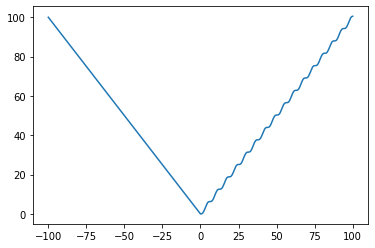

In [17]:
xs = np.linspace(-100, 100, 1000)
ys = list(map(f, xs))

plt.plot(xs, ys)
plt.show()

[0.03196861] [5.44499893e-06]
{'gradient_call_count': 119, 'function_call_count': 120, 'points': array([[-6.96531009e+00,  6.96531009e+00],
       [-6.86531009e+00,  6.86531009e+00],
       [-6.76531009e+00,  6.76531009e+00],
       [-6.66531009e+00,  6.66531009e+00],
       [-6.56531009e+00,  6.56531009e+00],
       [-6.46531009e+00,  6.46531009e+00],
       [-6.36531009e+00,  6.36531009e+00],
       [-6.26531009e+00,  6.26531009e+00],
       [-6.16531009e+00,  6.16531009e+00],
       [-6.06531009e+00,  6.06531009e+00],
       [-5.96531009e+00,  5.96531009e+00],
       [-5.86531009e+00,  5.86531009e+00],
       [-5.76531009e+00,  5.76531009e+00],
       [-5.66531009e+00,  5.66531009e+00],
       [-5.56531009e+00,  5.56531009e+00],
       [-5.46531009e+00,  5.46531009e+00],
       [-5.36531009e+00,  5.36531009e+00],
       [-5.26531009e+00,  5.26531009e+00],
       [-5.16531009e+00,  5.16531009e+00],
       [-5.06531009e+00,  5.06531009e+00],
       [-4.96531009e+00,  4.96531009e+00],


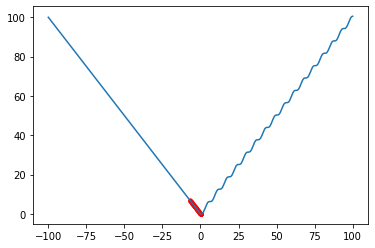

In [18]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1)
    print(x, y)
    print(meta)

    plt.plot(meta["points"][:, 0], meta["points"][:, 1], 'r.')
    plt.plot(xs, ys)
    plt.show()

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [19]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

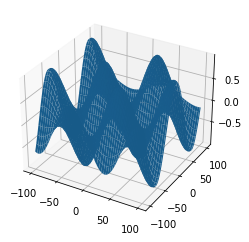

In [20]:
t = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f([X, Y]))

plt.show()

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW1/grad.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([coord, f(coord)]).reshape(1, 2),


[-29.90144283 -61.66844224] -0.9313968970284944
{'gradient_call_count': 1000, 'function_call_count': 1000, 'points': array([[array([-27.55233166, -77.06105603]), -0.4144839889437676],
       [array([-27.55435869, -77.03881662]), -0.4154811507895875],
       [array([-27.5563895, -77.0165883]), -0.4164773561898029],
       ...,
       [array([-29.89613246, -61.69520845]), -0.9309007623204797],
       [array([-29.89790434, -61.68627604]), -0.9310665215896418],
       [array([-29.89967447, -61.67735398]), -0.9312318995591267]],
      dtype=object)}


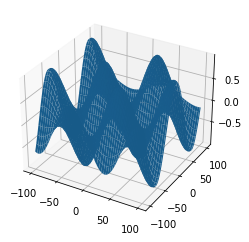

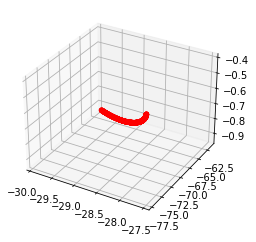

In [21]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (xs, y), meta = gradient_descent(f, 2, lr=0.5)
    print(xs, y)
    print(meta)

    t = np.linspace(-100, 100, 100)
    X, Y = np.meshgrid(t, t)
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(X, Y, f([X, Y]))

    XS = np.array([])
    YS = np.array([])
    ZS = meta["points"][:, 1]

    for point in meta["points"][:, 0]:
        XS = np.append(XS, point[0])
        YS = np.append(YS, point[1])

    ax_points = plt.figure().add_subplot(projection='3d')
    ax_points.scatter(XS, YS, ZS, c='r')

    plt.show()